In [1]:
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from scipy import special


# define background distribution

In [2]:
N_sample = 8192
system_noise_temp = 10

noise_var = 1.38e-23 * 50 * 60 * 205e6 * system_noise_temp
noise_var_freq = noise_var / N_sample


In [3]:
def rayleigh_cdf(x, N, var):
    return (1 - np.exp( - 1 * (x ** 2) / var)) ** (N)


In [4]:
x = np.linspace(2.5e-7, 5e-7, 10001)

y_cdf = rayleigh_cdf(x, N_sample, noise_var_freq)


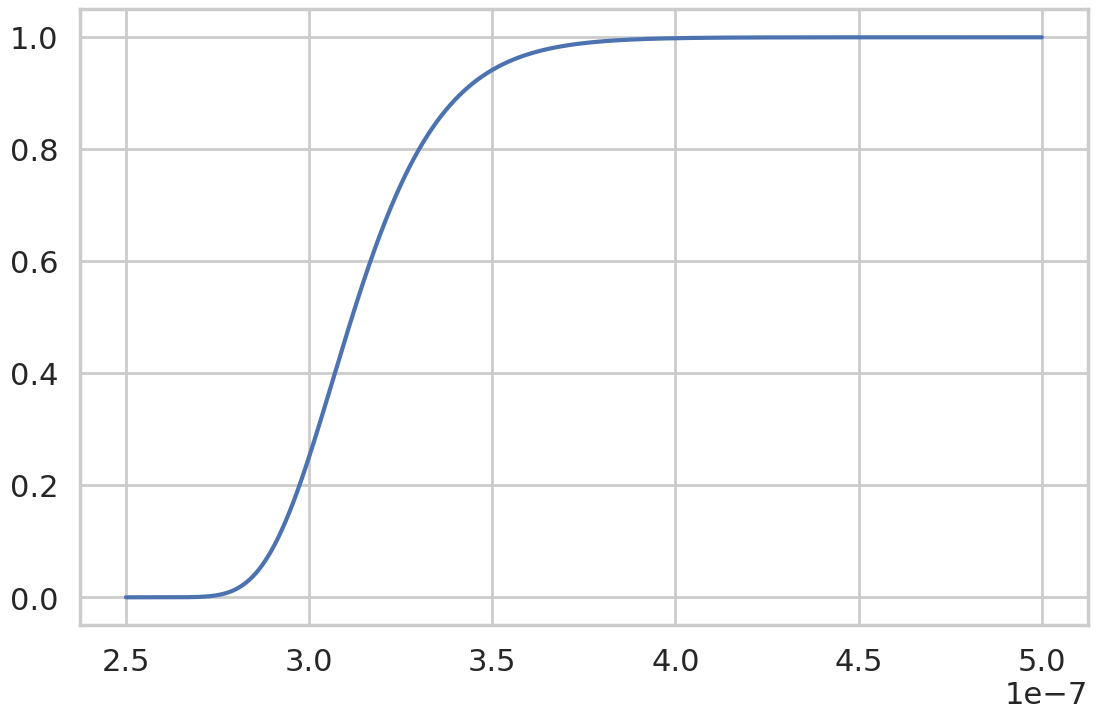

In [5]:
sns.set_theme(context='poster', style='whitegrid')
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

ax.plot(x, y_cdf)

(10000.0, 40000000.0)

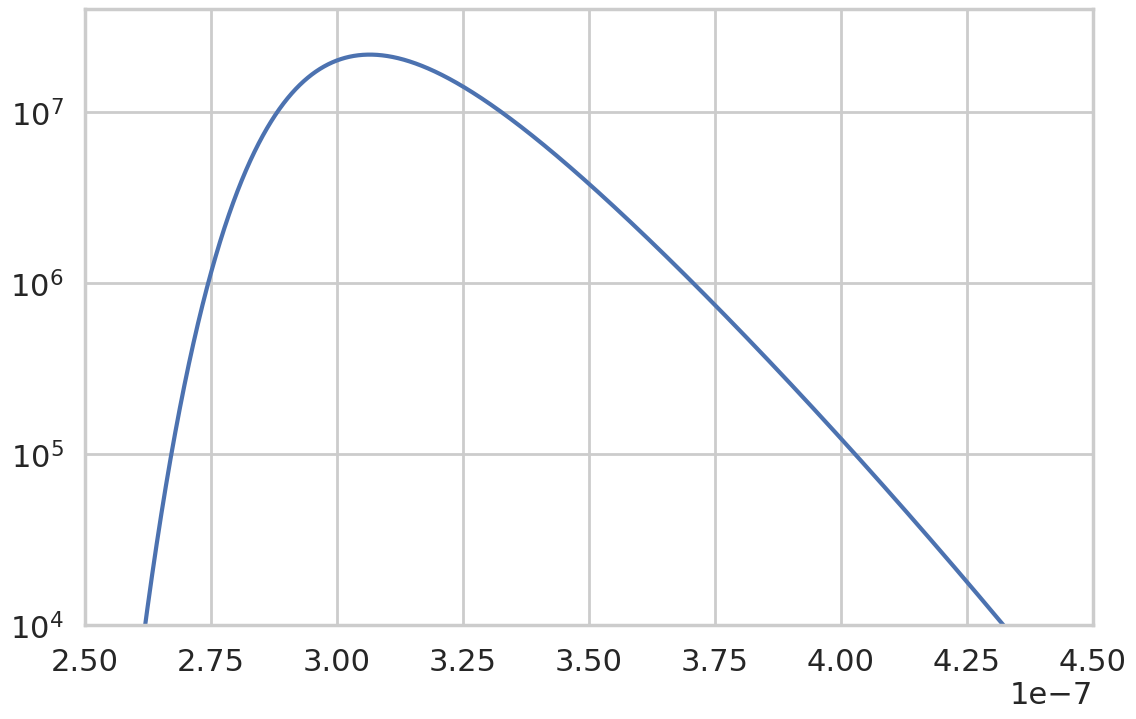

In [6]:
sns.set_theme(context='poster', style='whitegrid')
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)


norm = 1 / np.trapz(np.gradient(y_cdf), x)

ax.plot(x, norm *  np.gradient(y_cdf))
xlimits = ax.get_xlim()
ax.set_xlim(2.5e-7, 4.5e-7)
ax.set_yscale('log')
ax.set_ylim(1e4, 4e7)

In [7]:
n_mc = 100000
fft_max = np.zeros(n_mc)

for i in range(n_mc):
    
    noise = np.random.multivariate_normal([0,0], np.eye(2) * noise_var / 2, N_sample)
    noise = noise[:, 0] + 1j * noise[:, 1]
    
    noise = np.fft.fft(noise, norm='forward')
    fft_max[i] = np.max(abs(noise))
    
    

(10000.0, 40000000.0)

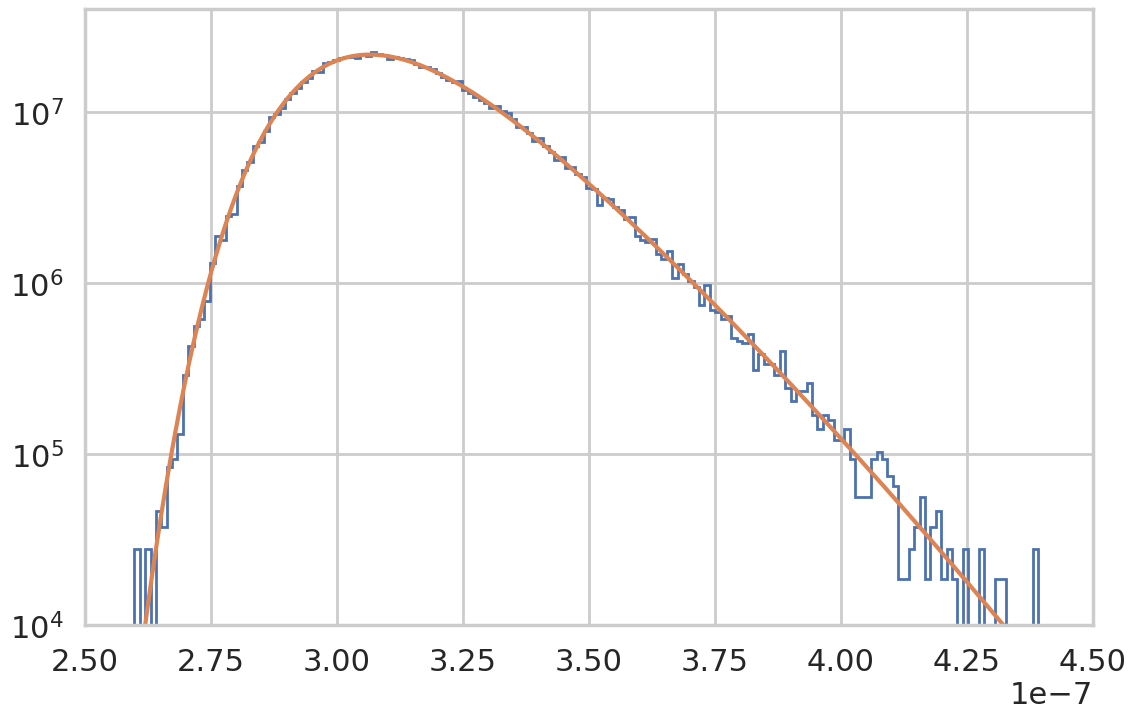

In [8]:
sns.set_theme(context='poster', style='whitegrid')
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)


hist = ax.hist(fft_max, 201, density=True, histtype='step')
#hist = np.histogram(fft_max, 201, density=True)
#bin_width = hist[1][1] - hist[1][0]

#ax.plot(hist[1][1:], hist[0] * bin_width)

ax.plot(x, norm *  np.gradient(y_cdf))


ax.set_yscale('log')
ax.set_xlim(2.5e-7, 4.5e-7)
ax.set_ylim(1e4, 4e7)

# Define distribution in the prescence of a signal

(15000000.0, 25000000.0)

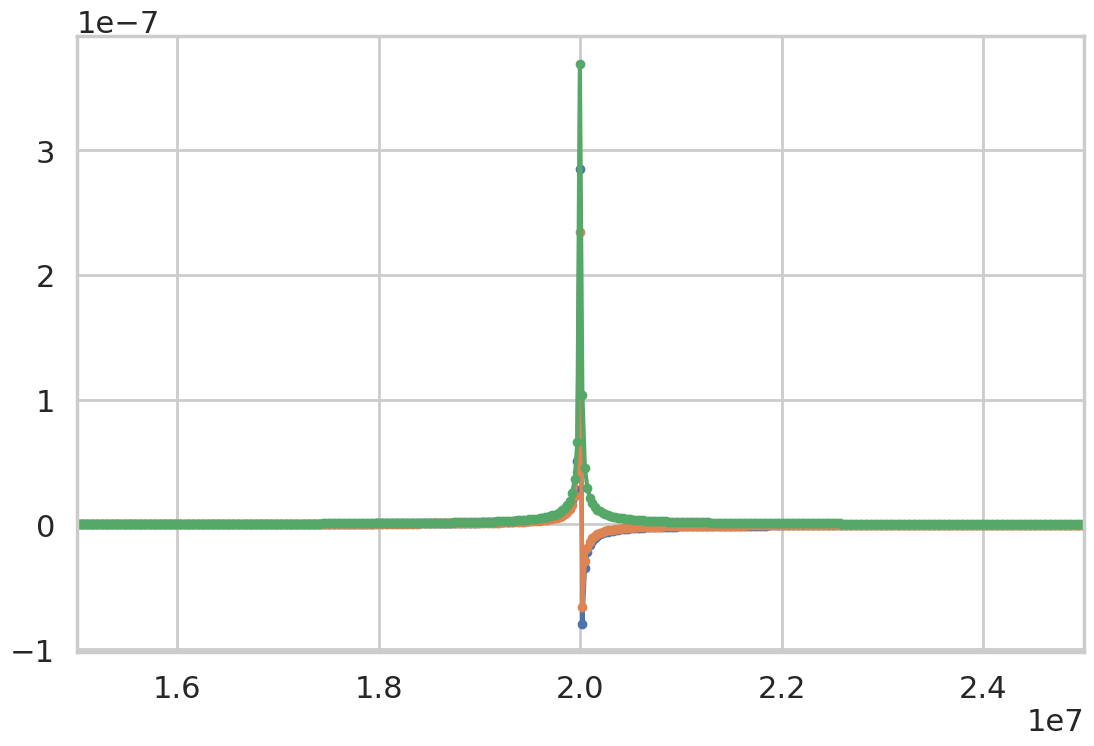

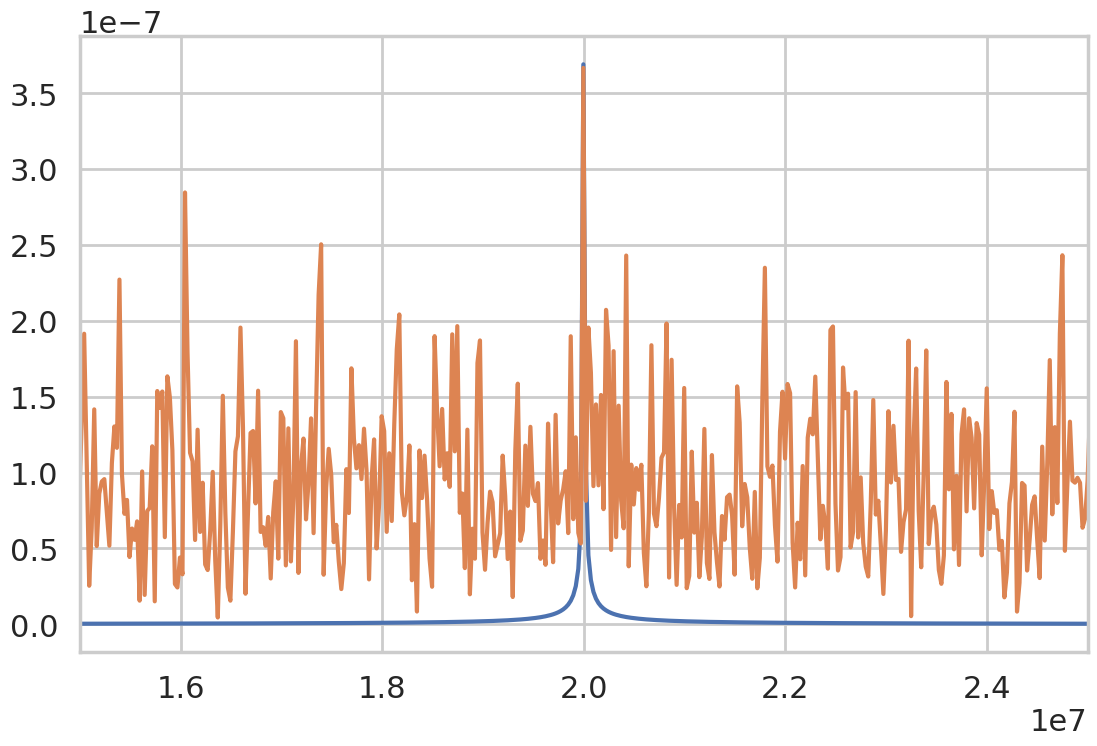

In [9]:
time = np.arange(0, N_sample, 1) / 205e6
signal_frequency = 20e6

signal_1 = 4e-7 * np.exp(1j * 2 * np.pi * time * signal_frequency + 0)

signal_1 = np.fft.fftshift(np.fft.fft(signal_1, norm='forward'))
frequencies = np.fft.fftshift(np.fft.fftfreq(N_sample, 1/205e6))

sns.set_theme(context='poster', style='whitegrid')
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)
ax.plot(frequencies, signal_1.real, marker='.')
ax.plot(frequencies, signal_1.imag, marker='.')
ax.plot(frequencies, abs(signal_1), marker='.')
ax.set_xlim(15e6, 25e6)

noise = np.random.multivariate_normal([0,0], np.eye(2) * noise_var / 2, N_sample)
noise = noise[:, 0] + 1j * noise[:, 1]
noise = np.fft.fft(noise, norm='forward')

sns.set_theme(context='poster', style='whitegrid')
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

ax.plot(frequencies, abs(signal_1))
ax.plot(frequencies, abs(signal_1 + noise))
ax.set_xlim(15e6, 25e6)

In [10]:
def signal_rician_pdf(x, var, loc):
    
    return x * np.exp( -1 * (x ** 2 + loc ** 2) / var ) * special.iv(0, x * 2 * loc / var)
    

In [11]:
loc = np.max(abs(signal_1)) 
x = np.linspace(0.5e-7, 8e-7, 10001)

pdf_1bin = signal_rician_pdf(x, noise_var_freq, loc)

norm_1bin = 1 / np.trapz(pdf_1bin, x)

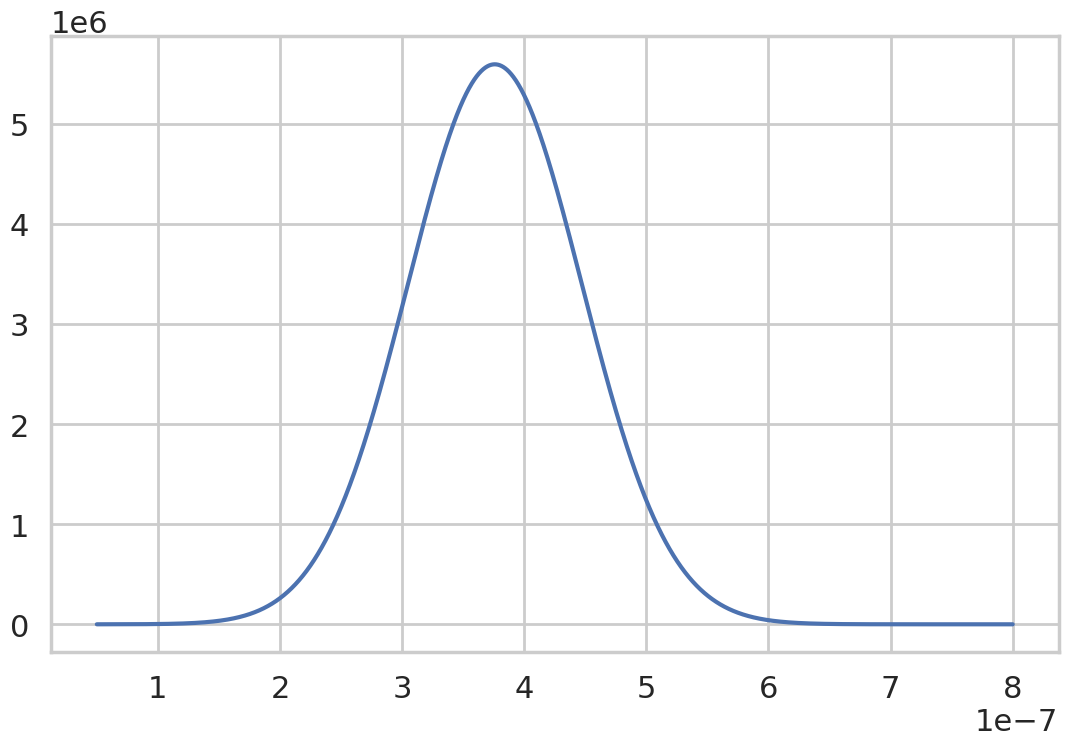

In [12]:
sns.set_theme(context='poster', style='whitegrid')
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

ax.plot(x, norm_1bin * pdf_1bin)
#ax.set_yscale('log')

In [13]:
max_ind = np.argmax(abs(signal_1))

In [14]:
n_mc = 100000
fft_max_N = np.zeros(n_mc)

for i in range(n_mc):
    
    noise = np.random.multivariate_normal([0,0], np.eye(2) * noise_var / 2, N_sample)
    noise = noise[:, 0] + 1j * noise[:, 1]
    
    noise = np.fft.fft(noise, norm='forward')
    fft_max[i] = abs(noise + signal_1)[max_ind]
    

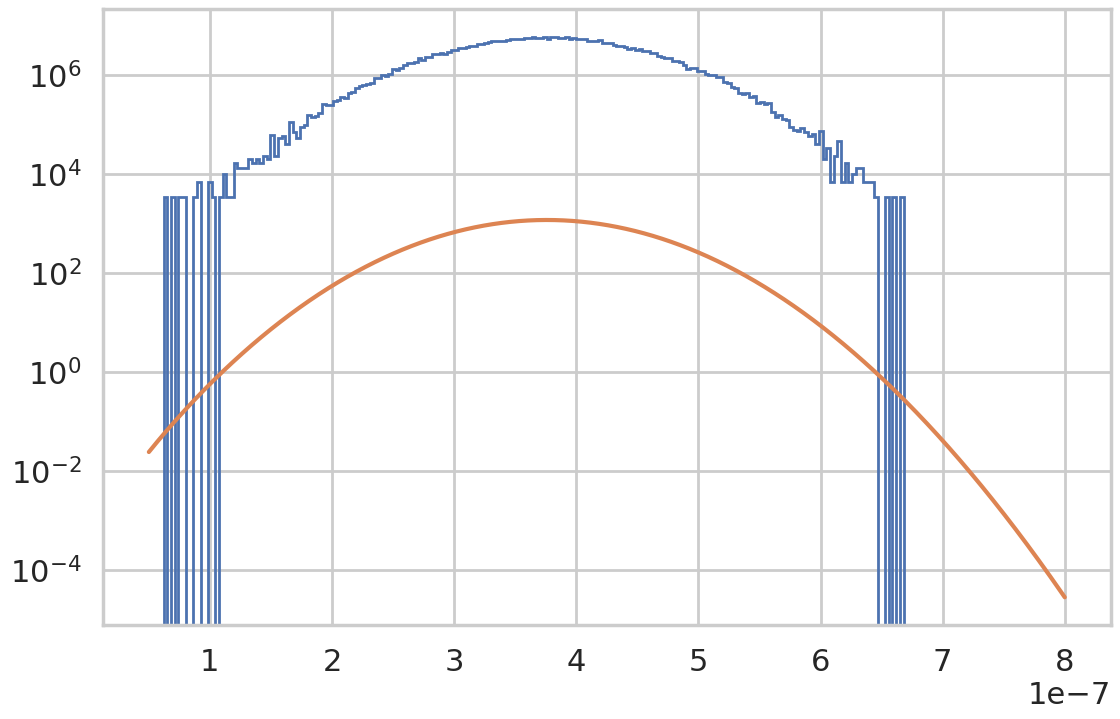

In [15]:
sns.set_theme(context='poster', style='whitegrid')
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

hist = ax.hist(fft_max, 201, density=True, histtype='step')
ax.plot(x, norm * pdf_1bin)
ax.set_yscale('log')

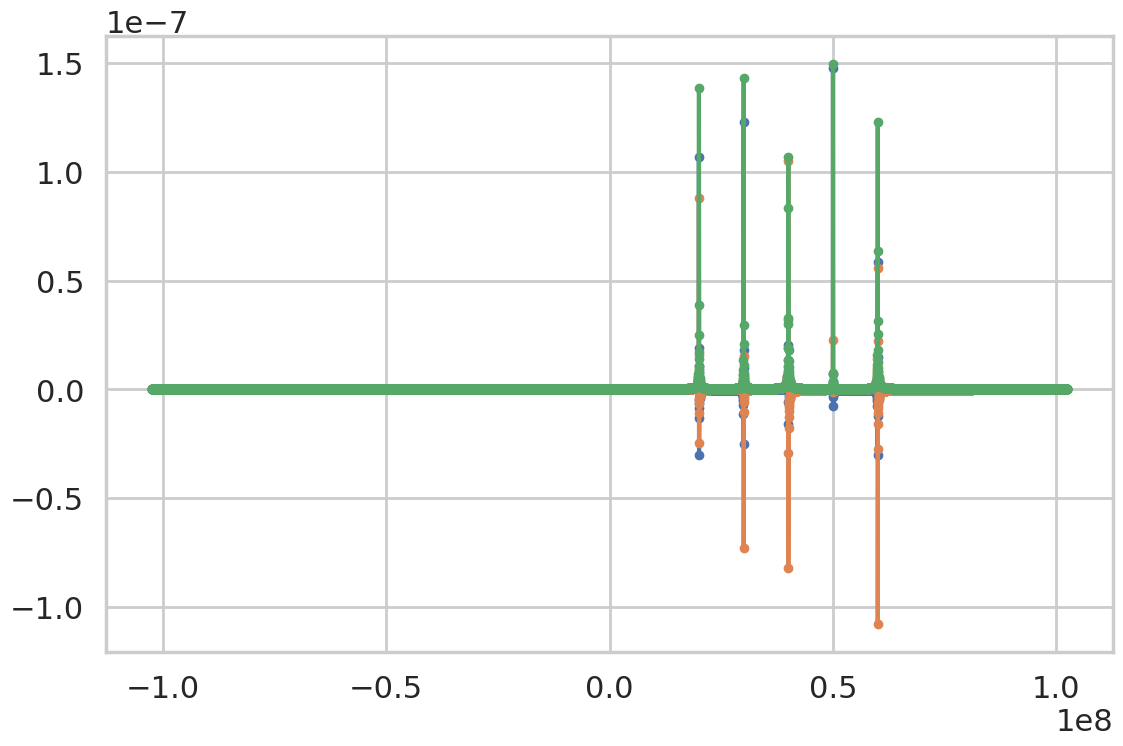

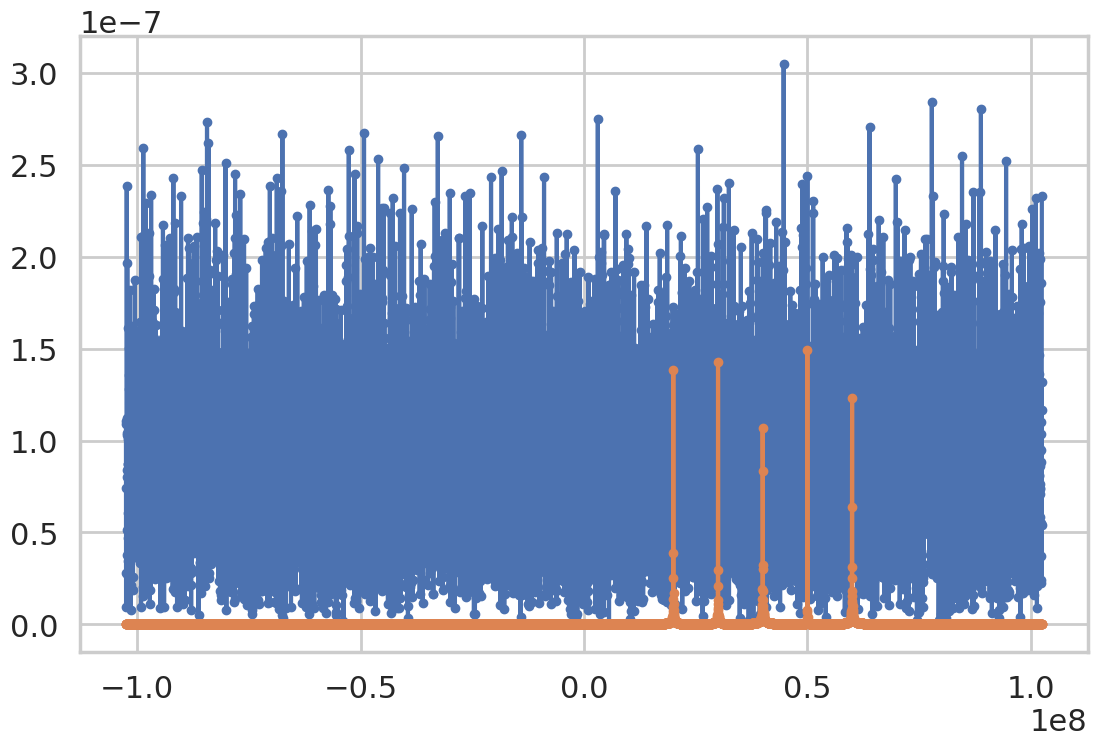

In [16]:
time = np.arange(0, N_sample, 1) / 205e6
n_freq = 5
signal_frequencies = np.linspace(20e6, 60e6, n_freq)

signal = 1.5e-7 * np.exp(
    1j * 2 * np.pi * time.reshape((1, time.size)) * signal_frequencies.reshape((n_freq, 1))
)

signal = np.fft.fftshift(np.fft.fft(signal, norm='forward', axis=-1))
signal = signal.sum(0)
frequencies = np.fft.fftshift(np.fft.fftfreq(N_sample, 1/205e6))

sns.set_theme(context='poster', style='whitegrid')
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

ax.plot(frequencies, signal.real, marker='.')
ax.plot(frequencies, signal.imag, marker='.')
ax.plot(frequencies, abs(signal), marker='.')
#ax.set_xlim(15e6, 65e6)

noise = np.random.multivariate_normal([0,0], np.eye(2) * noise_var / 2, N_sample)
noise = noise[:, 0] + 1j * noise[:, 1]
noise = np.fft.fft(noise, norm='forward')

sns.set_theme(context='poster', style='whitegrid')
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

ax.plot(frequencies, abs(signal + noise), marker='.')
ax.plot(frequencies, abs(signal), marker='.')

signal_peak_threshold = 2e-8
signal_peaks = abs(signal)[np.where(abs(signal) > signal_peak_threshold)[0]]


In [17]:
def cdf_from_pdf(x, pdf):
    cdf = []
    for i in range(x.size):
        cdf.append(np.trapz(pdf[0:i+1], x[0:i+1]))
    return np.array(cdf)

def noisy_freq_series_max_cdf(x, var, signal_peaks):
    
    cdf = np.ones(x.size)
    for i, peak in enumerate(signal_peaks):
        pdf_i = signal_rician_pdf(x, var, signal_peaks[i])
        norm_i = 1 / np.trapz(pdf_i, x)
        cdf_i = cdf_from_pdf(x, norm_i * pdf_i)
        
        #plt.figure()
        #plt.plot(cdf_i)
        #plt.show()
        #input()
        
        cdf *= cdf_i
        
    return cdf
    

In [18]:
series_cdf = noisy_freq_series_max_cdf(x, noise_var_freq, signal_peaks)

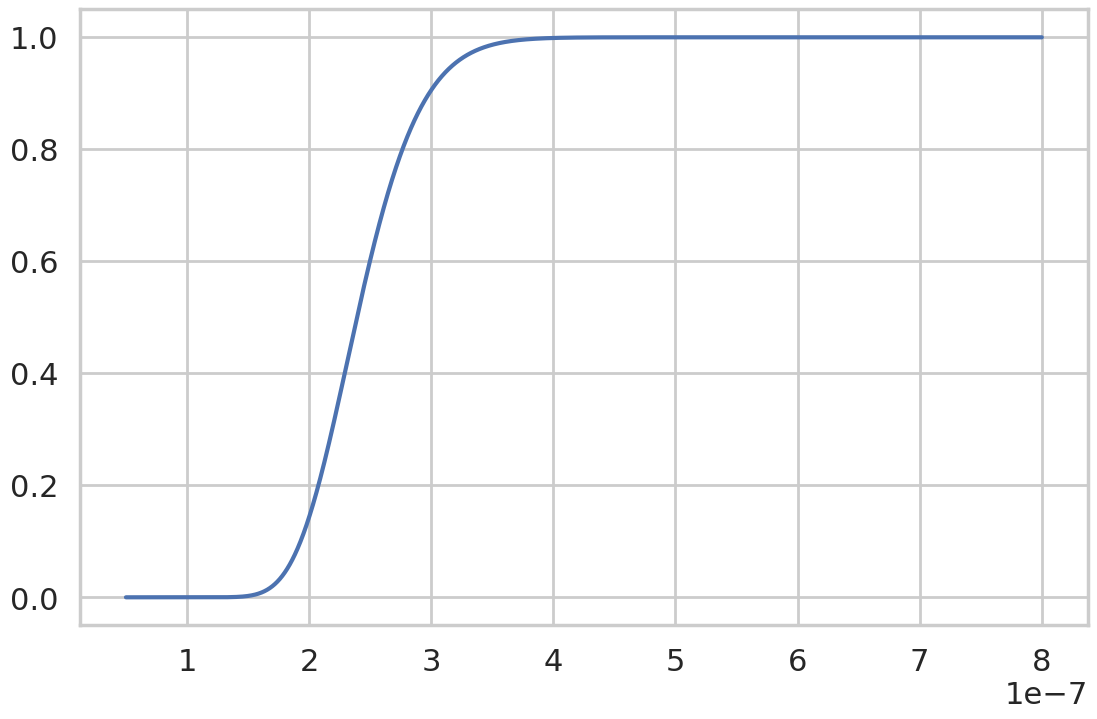

In [19]:
    
sns.set_theme(context='poster', style='whitegrid')
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

ax.plot(x, series_cdf)
    

In [20]:
series_pdf = np.gradient(series_cdf)
norm = 1 / np.trapz(series_pdf, x)


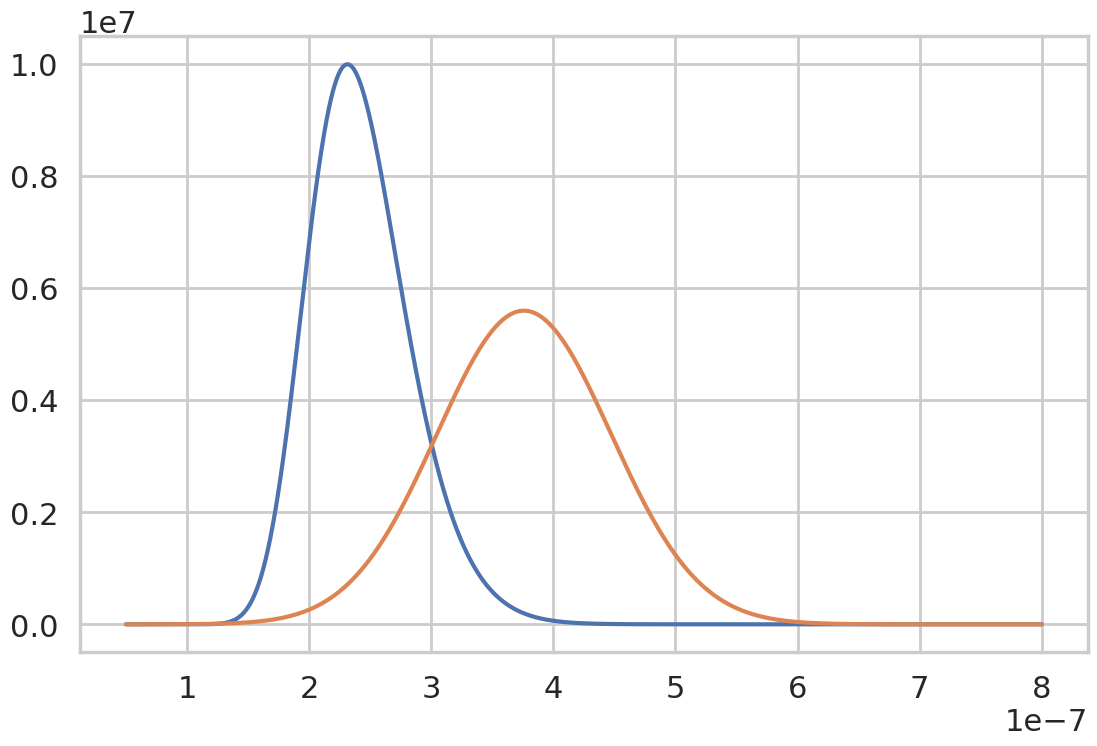

In [21]:
sns.set_theme(context='poster', style='whitegrid')
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

ax.plot(x, norm * series_pdf)
ax.plot(x, norm_1bin * pdf_1bin)


In [22]:
signal_peak_inds = np.where(abs(signal) > signal_peak_threshold)[0]

In [23]:
n_mc = 100000
fft_max_N = np.zeros(n_mc)

for i in range(n_mc):
    
    noise = np.random.multivariate_normal([0,0], np.eye(2) * noise_var / 2, N_sample)
    noise = noise[:, 0] + 1j * noise[:, 1]
    
    noise = np.fft.fft(noise, norm='forward')
    fft_max_N[i] = np.max(abs(noise + signal)[signal_peak_inds])
    

(2.5e-07, 8e-07)

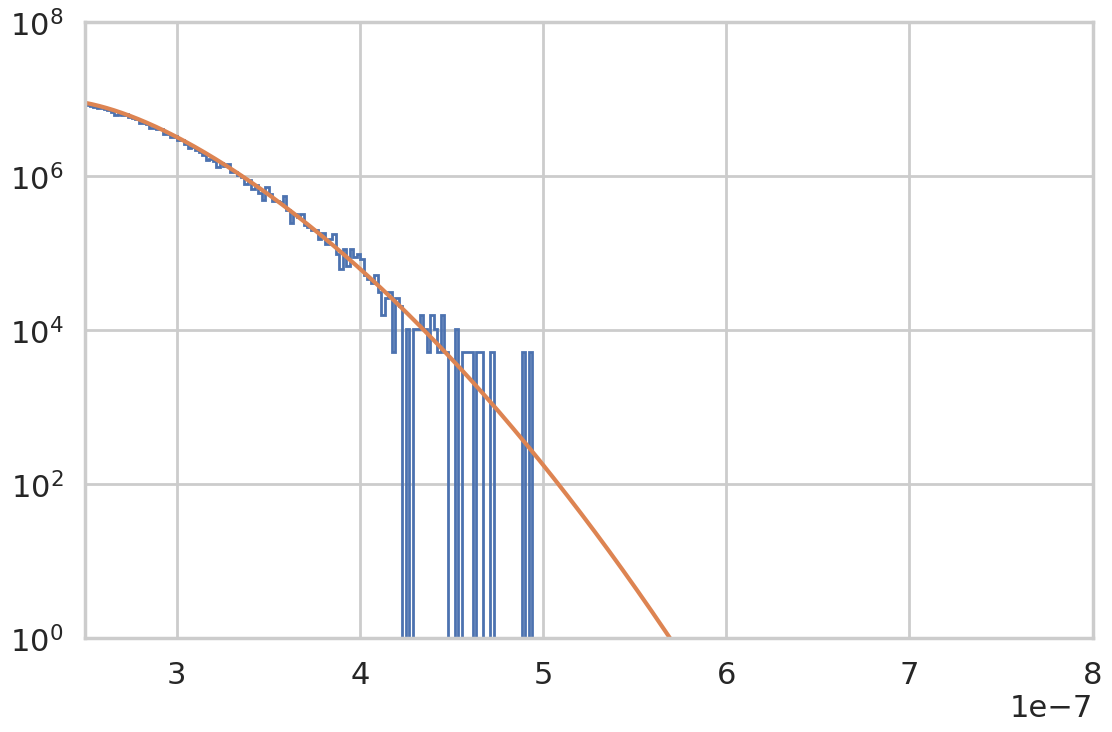

In [24]:
sns.set_theme(context='poster', style='whitegrid')
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)

hist = ax.hist(fft_max_N, 201, density=True, histtype='step')
ax.plot(x, norm * series_pdf)
ax.set_yscale('log')
ax.set_ylim(1, 1e8)
ax.set_xlim(2.5e-7, 8e-7)

# Compare Background PDF to Signal

In [25]:
def background_cdf(x, N, var):
    return (1 - np.exp( - 1 * (x ** 2) / var)) ** (N)

def signal_rician_pdf(x, var, loc):
    
    return x * np.exp( -1 * (x ** 2 + loc ** 2) / var ) * special.iv(0, x * 2 * loc / var)

def cdf_from_pdf(x, pdf):
    cdf = []
    for i in range(x.size):
        cdf.append(np.trapz(pdf[0:i+1], x[0:i+1]))
    return np.array(cdf)

def noisy_freq_series_max_cdf(x, var, signal_peaks):
    
    cdf = np.ones(x.size)
    for i, peak in enumerate(signal_peaks):
        pdf_i = signal_rician_pdf(x, var, signal_peaks[i])
        norm_i = 1 / np.trapz(pdf_i, x)
        cdf_i = cdf_from_pdf(x, norm_i * pdf_i)
        
        cdf *= cdf_i
        
    return cdf


In [26]:
N_sample = 8192
system_noise_temp = 1
n_freq = 5

noise_var = 1.38e-23 * 50 * 60 * 205e6 * system_noise_temp
noise_var_freq = noise_var / N_sample

x = np.linspace(0.5e-7, 8e-7, 10001)

time = np.arange(0, N_sample, 1) / 205e6

signal_frequencies = np.linspace(20e6, 60e6, n_freq)

signal = 1.5e-7 * np.exp(
    1j * 2 * np.pi * time.reshape((1, time.size)) * signal_frequencies.reshape((n_freq, 1))
)

signal = np.fft.fftshift(np.fft.fft(signal, norm='forward', axis=-1))
signal = signal.sum(0)
frequencies = np.fft.fftshift(np.fft.fftfreq(N_sample, 1/205e6))

signal_peak_threshold = 0.5e-8
signal_peak_inds = np.where(abs(signal) > signal_peak_threshold)[0]


In [27]:
cdf_noise = background_cdf(x, N_sample, noise_var_freq, )
pdf_noise = np.gradient(cdf_noise) / np.trapz(np.gradient(cdf_noise), x)

cdf_signal = noisy_freq_series_max_cdf(x, noise_var_freq, abs(signal)[signal_peak_inds])
pdf_signal = np.gradient(cdf_signal) / np.trapz(np.gradient(cdf_signal), x)

(1.2499999999999993e-08, 3e-07)

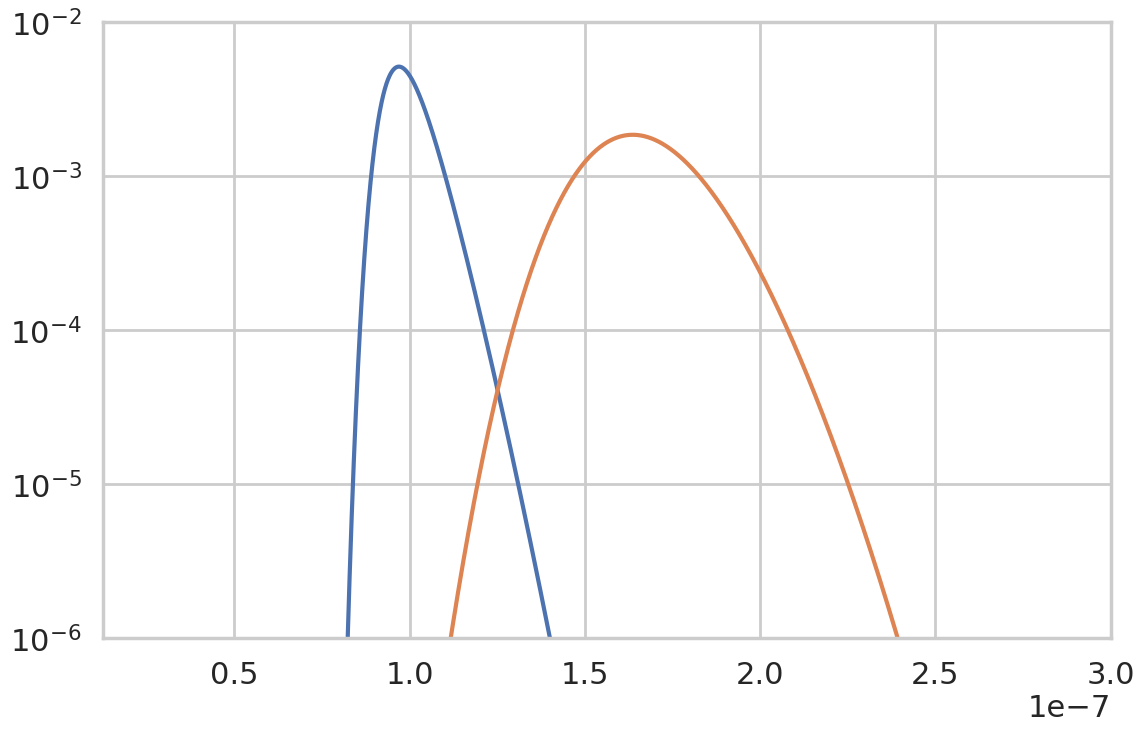

In [28]:
sns.set_theme(context='poster', style='whitegrid')
fig = plt.figure(figsize=(13, 8))
ax = fig.add_subplot(1,1,1)


ax.plot(x, pdf_noise * (x[1] - x[0]))
ax.plot(x, pdf_signal * (x[1] - x[0]))
ax.set_yscale('log')
ax.set_ylim(1e-6, 1e-2)
xlims = ax.get_xlim()
ax.set_xlim(xlims[0], 3e-7)

In [29]:
x.range

AttributeError: 'numpy.ndarray' object has no attribute 'range'